# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 29.11.2024

Мягий дедлайн: 23:59 11.12.2024

Жестокий дедлайн: 23:59 13.12.2024

### О задании

Задание состоит из трёх разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево для классификации и сравните его со стандартное имплементацией из sklearn.
3. В третьем разделе вы сделаете решающее дерево для регрессии, в листьях которого линейные модели.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 11 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест [https://contest.yandex.ru/contest/72492] нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__  MAX

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим три простых двумерных датасета сделанных с помощью `make_moons`, `make_circles`, `make_classification` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [61]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [62]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

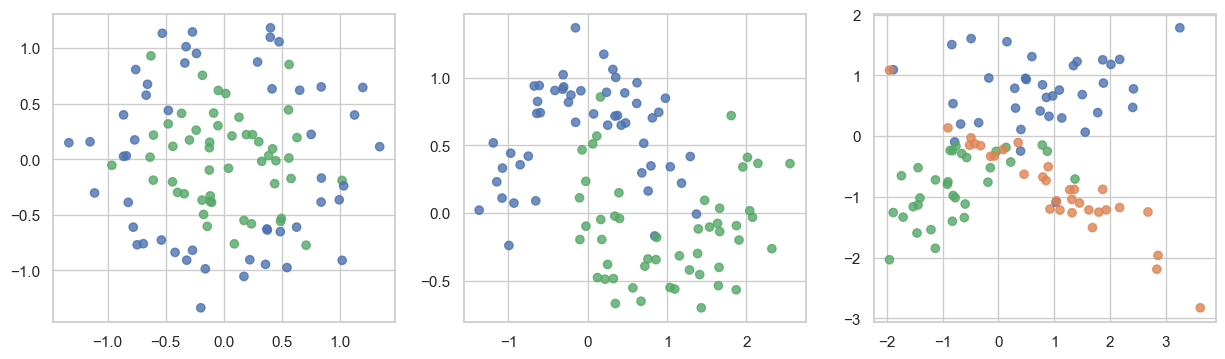

In [63]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [64]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)
    
    plt.show()

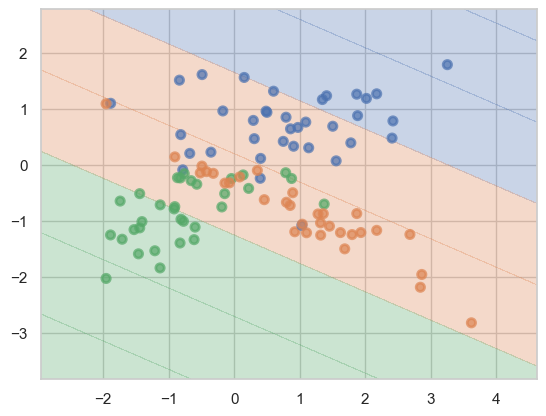

In [65]:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

Train Accuracy: 1.00
Test Accuracy: 0.73


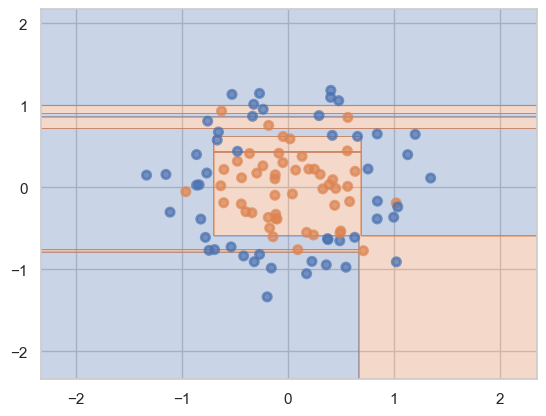

Train Accuracy: 1.00
Test Accuracy: 0.87


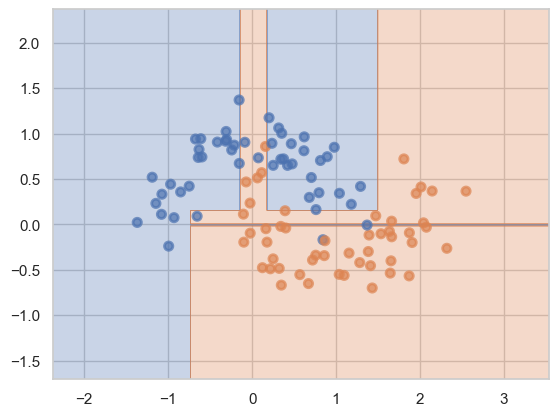

Train Accuracy: 1.00
Test Accuracy: 0.83


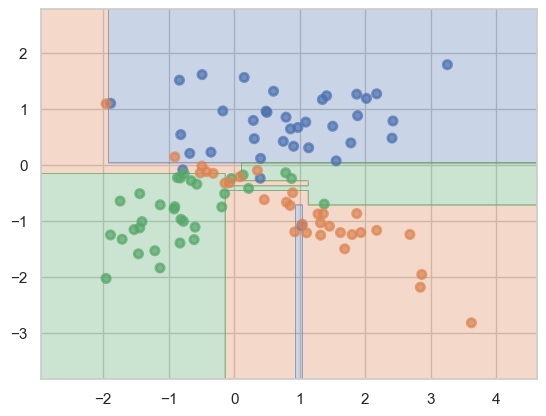

In [66]:
from sklearn.metrics import accuracy_score

for X, y in datasets:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    dtc = DecisionTreeClassifier(random_state=42)
    dtc.fit(X_train, y_train)
    
    train_acc = accuracy_score(y_train, dtc.predict(X_train))
    test_acc = accuracy_score(y_test, dtc.predict(X_test))
    
    print(f"Train Accuracy: {train_acc:.2f}")
    print(f"Test Accuracy: {test_acc:.2f}")
    
    plot_surface(dtc, X, y)

__Ответ:__ 

Деревья очень сильно переобучились

__Задание 2. (1.25 баллов)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки / accuracy. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

__Бонус (0.75 баллов)__

Вместо того, чтобы рисовать  кучу графиков, сделайте интерактивную визуализацию разделяющей гиперплоскости с помощью библиотеки `plotly` (конкретнее, вам пригодится `plotly.graph_objects`): у вас должен получиться виджет с ползунком, по которому можно выбрать параметры `max_depth` и `min_samples_leaf` и посмотреть, как в зависимости от них меняется разделяющая поверхность и прогнозы модели. Если всё сделать аккуратно, получится очень красиво. Помните, что при загрузке в anytask виджеты могут много весить и надо подождать. Если ваш ноутбук не загружается -- попробуйте загрузить сначала с очищенным выводом этой ячейки. 

Заранее предупреждаем, что бонус сложный. Полезно будет ознакомиться:
 - https://plotly.com/python/sliders/
 - https://plotly.com/python/dropdowns/
 - https://plotly.com/python/knn-classification/

In [67]:
import plotly 
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

fig = make_subplots(rows=3, cols=1, vertical_spacing=0.045)

for i, (X, y) in enumerate(datasets):
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    cls = plotly.colors.qualitative.Dark2

    for class_value in np.unique(y):
        idx = y_train == class_value
        fig.add_trace(go.Scatter(
            x=X_train[idx, 0],
            y=X_train[idx, 1],
            mode='markers',
            marker=dict(symbol='circle', color=cls[class_value], size=6),
            name=f'Train, class {class_value}',
            showlegend=(i==2)
            ),
            row=i + 1, col=1
        )

        idx = y_test == class_value
        fig.add_trace(go.Scatter(
            x=X_test[idx, 0],
            y=X_test[idx, 1],
            mode='markers',
            marker=dict(symbol='square', color=cls[class_value], size=8),
            name=f'Test, class {class_value}',
            showlegend=(i==2)
            ),
            row=i + 1, col=1
        )
        
annotations_list = []

for i, (X, y) in enumerate(datasets):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
            
    max_depth_range = range(1, 8)
    min_samples_leaf_range = [10, 5, 3, 1]

    for max_depth in max_depth_range:  
        for min_samples_leaf in min_samples_leaf_range:
            dtc = DecisionTreeClassifier(random_state=42, max_depth=max_depth, min_samples_leaf=min_samples_leaf)
            dtc.fit(X_train, y_train)

            plot_step = 0.01
            x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
            y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
            xrange = np.arange(x_min, x_max, plot_step)
            yrange = np.arange(y_min, y_max, plot_step)
            xx, yy = np.meshgrid(xrange, yrange)

            Z = dtc.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)

            train_acc = accuracy_score(y_train, dtc.predict(X_train))
            test_acc = accuracy_score(y_test, dtc.predict(X_test))

            fig.add_trace(
                go.Contour(
                    x=xrange,
                    y=yrange,
                    z=Z,
                    showscale=False,
                    colorscale=plotly.colors.qualitative.Pastel2,
                    opacity=1,
                    hoverinfo='skip',
                    visible=False
                ),
                row=i + 1, col=1
            )

            annotations_list.append(
                [dict(
                    x=0,
                    y=y_max - (y_max - y_min) * 0.08,
                    xref=f"paper",
                    yref=f"y{i+1}",
                    text=f"Train Accuracy: {train_acc:.2f}",
                    showarrow=False,
                    font=dict(size=14, color="black"),
                    bgcolor="lightyellow",
                    bordercolor="black"
                ),
                dict(
                    x=0.24,
                    y=y_max - (y_max - y_min) * 0.08,
                    xref=f"paper",
                    yref=f"y{i + 1}",
                    text=f"Test Accuracy: {test_acc:.2f}",
                    showarrow=False,
                    font=dict(size=14, color="black"),
                    bgcolor="lightyellow",
                    bordercolor="black"
                )
                ]
            )
             
    fig.data[-1].visible = True
    fig.add_annotation(annotations_list[-1][0])
    fig.add_annotation(annotations_list[-1][1])
            
steps = []
offset = len(min_samples_leaf_range) * len(max_depth_range)

for i in range(len(max_depth_range)):
    for j in range(len(min_samples_leaf_range)):
        idx = i * len(min_samples_leaf_range) + j
        step = dict(
            method="update",
            args=[
                {"visible": [True] * 14 + [False] * (len(fig.data) - 14)},
                {'annotations': annotations_list[idx] + annotations_list[idx + offset] + \
                                 annotations_list[idx + 2 * offset]}]
        )
        step["args"][0]["visible"][14 + idx] = True

        step["args"][0]["visible"][14 + idx + offset] = True
        step["args"][0]["visible"][14 + idx + 2 * offset] = True

        step["label"] = f'{max_depth_range[i]}, {min_samples_leaf_range[j]}'
        steps.append(step)

sliders = [
    dict(
    currentvalue={"prefix": "max_depth, min_samples_leaf = "},
    pad={"t": 50},
    steps=steps,
    ),

]

fig.update_layout(
    sliders=sliders,
    height=900
)
    
fig.show()

__Ответ:__

Разделяющиая поверхность усложняется с ростом `max_depth` и `min_samples_leaf`, а обобщающая способность сначала растет, а потом падает. Для более сложных датасетов требуются большие значения `max_depth` и `min_samples_leaf` для достижения наилучшей точности на тесте.

Это происходит потому что сразу у нас модели слишком простые, чтобы улавливать все закономерности в данных, потом все ок, а затем наступает сильное переобучение. 

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [9]:
import importlib
import hw5code

importlib.reload(hw5code)

from hw5code import find_best_split

data = pd.read_csv('students.csv')
features = data.columns[:-1]
target = data.columns[-1]

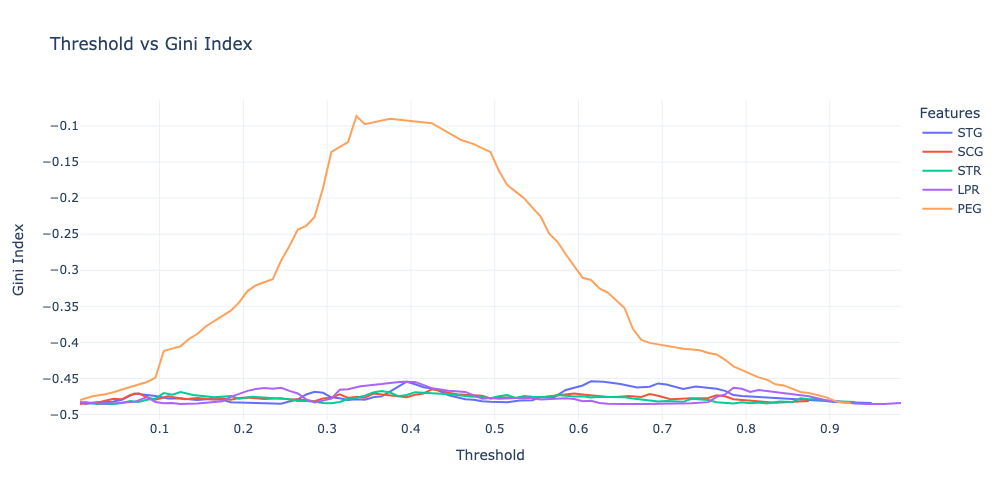

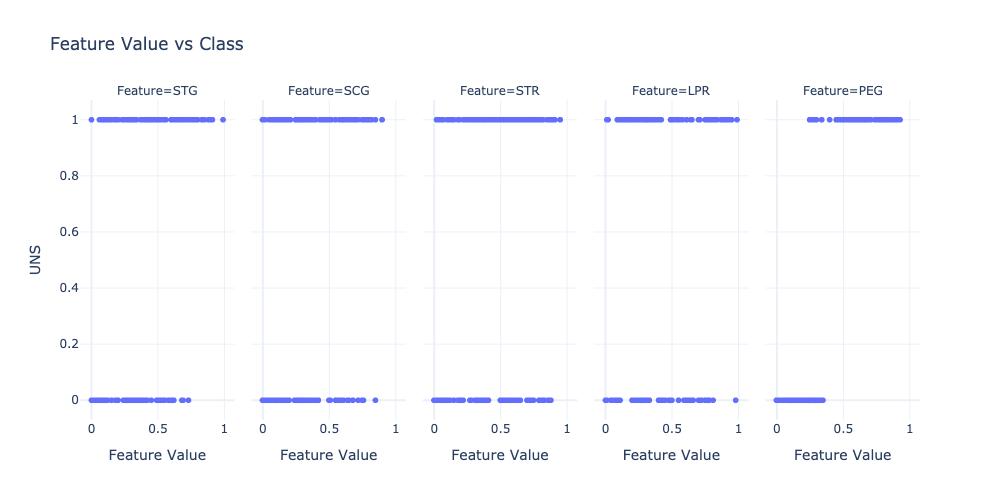

In [10]:
import plotly.express as px

fig = go.Figure()

for feature in features:
    thresholds, ginis, _, _ = find_best_split(data[feature].values, data[target].values)
    fig.add_trace(go.Scatter(x=thresholds, y=ginis, mode='lines', name=feature))

fig.update_layout(
    title="Threshold vs Gini Index",
    xaxis_title="Threshold",
    yaxis_title="Gini Index",
    legend_title="Features",
    template="plotly_white",
    width=1000
).show(renderer='png')

fig = px.scatter(
    data.melt(id_vars=target, var_name='Feature', value_name='Feature Value'),
    x='Feature Value',
    y=target,
    facet_col='Feature',
    title="Feature Value vs Class"
)

fig.update_layout(
    template='plotly_white',
    width=1000
).show(renderer='png')


__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** 

Я бы делил по PEG, на scatter-графиках тоже видно что признак хорошо разделяет.

Я бы сказал что для хороших признаков кривая - явно вогнутая функция, похожая на $\wedge$. Для признаков по которым деление практически невоможно кривые - это просто линии, похожие на функцию $y = C$.

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [11]:
import importlib
import hw5code

importlib.reload(hw5code)

from hw5code import DecisionTree
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('mushroom/agaricus-lepiota.data')
features = data.columns[1:]
target = data.columns[0]

for column in data.columns:
    data[column] = LabelEncoder().fit_transform(data[column])
    

X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.5, random_state=42)

clf = DecisionTree(feature_types=['categorical'] * len(features))
clf.fit(X_train.to_numpy(), y_train.to_numpy())

y_pred = clf.predict(X_test.to_numpy())
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")

Accuracy: 1.0000


__Задание 8. (1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (https://github.com/esokolov/ml-course-hse/blob/master/2024-fall/homework-practice/homework-practice-05-trees/tic-tac-toe-endgame.csv).

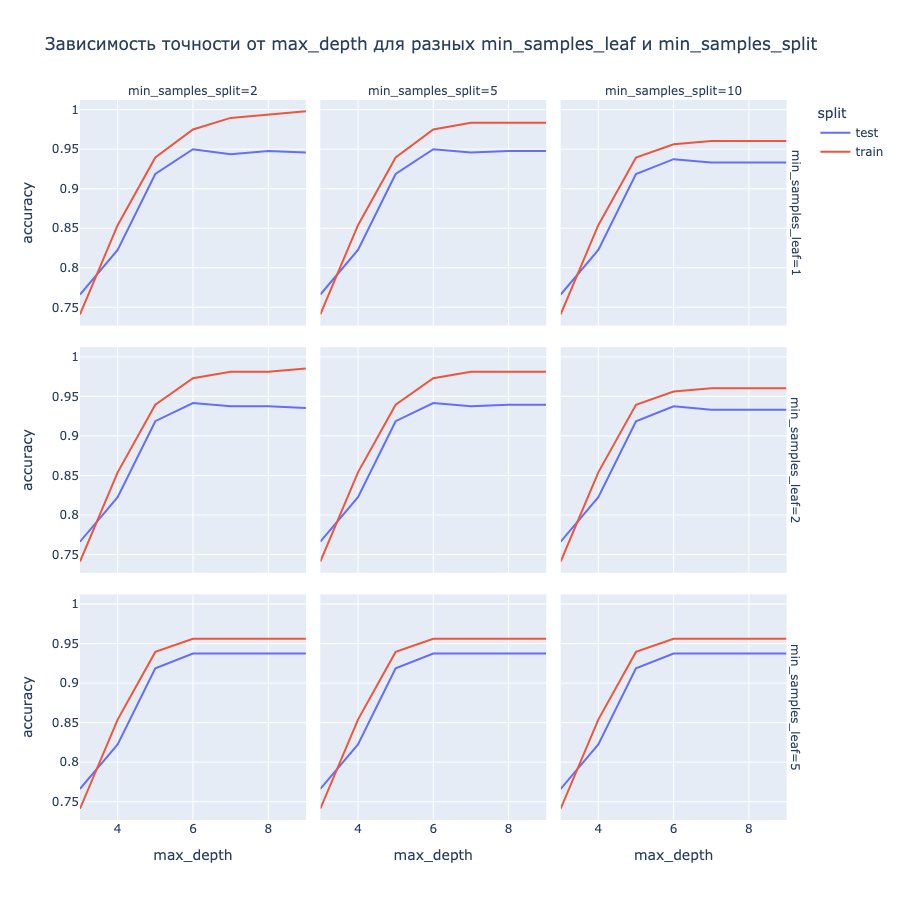

In [12]:
data = pd.read_csv('tic-tac-toe-endgame.csv')
features = data.columns[:-1]
target = data.columns[-1]

for column in data.columns:
    data[column] = LabelEncoder().fit_transform(data[column])
    
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.5, random_state=42)

max_depth_values = np.arange(3, 10, step=1)
min_samples_split_values = [2, 5, 10]
min_samples_leaf_values = [1, 2, 5]

results = []

for max_depth in max_depth_values:
    for min_samples_split in min_samples_split_values:
        for min_samples_leaf in min_samples_leaf_values:
            
            clf = DecisionTree(
                feature_types=['categorical'] * len(features),
                max_depth=max_depth,
                min_samples_split=min_samples_split,
                min_samples_leaf=min_samples_leaf
            )
            clf.fit(X_train.to_numpy(), y_train.to_numpy())
            
            accuracy = accuracy_score(y_test, clf.predict(X_test.to_numpy()))       
            results.append((max_depth, min_samples_split, min_samples_leaf, accuracy, 'test'))
            
            accuracy = accuracy_score(y_train, clf.predict(X_train.to_numpy()))       
            results.append((max_depth, min_samples_split, min_samples_leaf, accuracy, 'train'))
            

df_results = pd.DataFrame(results, columns=['max_depth', 'min_samples_split', 'min_samples_leaf', 'accuracy', 'split'])

fig = px.line(
    df_results, x='max_depth', y='accuracy', color='split',
    facet_row='min_samples_leaf', facet_col='min_samples_split', 
    title="Зависимость точности от max_depth для разных min_samples_leaf и min_samples_split"
)

fig.update_layout(height=900, width=900).show(renderer='png')

__Задание 9. (до 3-х баллов)__

Реализуйте класс `LinearRegressionTree`:

 - Если вам удобно, можете сделать его наследуемым от `DecisionTree` и переопределить только необходимые методы. Можете добавить новые — как вам нравится.
 - В листьях находятся не константные предсказания, а линейные модели (можно использовать из библиотеки `sklearn`).
 - Ваша реализация должна решать задачу __регрессии__, поэтому для поиска оптимального разбиения нужно написать новую функцию.
 - **Максимум 1.8 балла, если**:
   - В качестве критерия для разбиения считаете среднее квадратное/абсолютное отклонение
   - Перебираете все пороги
   - Ваша реализация строится как обычное решающее дерево для регрессии, но в листьях линейные модели.
   - Есть поддержка параметра max_depth
 - **Максимум три балла, если выполнено следующее**:
     - Для разбиения перебираются не все пороги. Пороги выбираются из значений признаков, разбитых на квантили.
     - Для разбиении выбирается порог, который минимизирует суммарную ошибку линейных моделей после разбиения: $$\text{loss} = \frac{n_{left}}{n} \cdot \text{loss}_{left} + \frac{n_{right}}{n} \cdot \text{loss}_{right}$$ (Разумеется, для оценки этих ошибок вам надо будет строить много линейных моделей, это не дисперсии. В качестве функционала ошибки возьмите MAE или MSE)
     - Есть поддержка параметров max_depth, min_samples_split, min_samples_leaf

__Задание 10. (1 балл)__

Проведите эксперименты с реализованным вами линейным деревом на любом подходящем датасете из sklearn (https://scikit-learn.org/1.5/datasets/real_world.html), который вам нравится. Подберите лучшие гиперпараметры (max_depth и остальные, если вы их реализовывали). Сравните ваше дерево со стандартным деревом для регрессии из sklearn, для него тоже подберите гиперпараметры.

In [54]:
import importlib
import hw5code

importlib.reload(hw5code)

from hw5code import LinearRegressionTree
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

data = fetch_california_housing()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

### Оптуна делает ВЖЖЖЖЖЖ

In [55]:
import optuna

def objective(trial):
    max_depth = trial.suggest_int('max_depth', 1, 5)
    min_samples_split = trial.suggest_int('min_samples_split', 15, 100)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 5, max(1, min_samples_split - 1))
    
    
    clf = LinearRegressionTree(
        feature_types=['real'] * len(X_train),
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        n_q=100
    )
    
    clf.fit(X_train, y_train)
    return r2_score(y_val, clf.predict(X_val))


study = optuna.create_study(direction='maximize')
study.optimize(objective, timeout=60*30, n_jobs=-1, show_progress_bar=True, n_trials=50)

print(f"Best parameters for LinearRegressionTree: {study.best_params}")

[I 2024-12-11 23:22:45,773] A new study created in memory with name: no-name-632ecaf9-af39-4b0c-819e-2b21f0758f93


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2024-12-11 23:24:21,427] Trial 13 finished with value: 0.68349968648865 and parameters: {'max_depth': 1, 'min_samples_split': 94, 'min_samples_leaf': 21}. Best is trial 6 with value: 0.68349968648865.
[I 2024-12-11 23:24:23,815] Trial 12 finished with value: 0.68349968648865 and parameters: {'max_depth': 1, 'min_samples_split': 70, 'min_samples_leaf': 53}. Best is trial 6 with value: 0.68349968648865.
[I 2024-12-11 23:25:00,038] Trial 11 finished with value: 0.68349968648865 and parameters: {'max_depth': 1, 'min_samples_split': 84, 'min_samples_leaf': 20}. Best is trial 11 with value: 0.68349968648865.
[I 2024-12-11 23:25:07,652] Trial 11 finished with value: 0.68349968648865 and parameters: {'max_depth': 1, 'min_samples_split': 35, 'min_samples_leaf': 34}. Best is trial 11 with value: 0.68349968648865.
[I 2024-12-11 23:25:11,543] Trial 10 finished with value: 0.7043449250665378 and parameters: {'max_depth': 2, 'min_samples_split': 38, 'min_samples_leaf': 22}. Best is trial 10 with 

[I 2024-12-11 23:39:44,202] Trial 5 finished with value: 0.7420337960143586 and parameters: {'max_depth': 4, 'min_samples_split': 57, 'min_samples_leaf': 51}. Best is trial 5 with value: 0.7420337960143586.
[I 2024-12-11 23:39:45,045] Trial 4 finished with value: 0.7418743479207484 and parameters: {'max_depth': 4, 'min_samples_split': 43, 'min_samples_leaf': 13}. Best is trial 5 with value: 0.7420337960143586.
[I 2024-12-11 23:39:49,985] Trial 8 finished with value: 0.7417948690445215 and parameters: {'max_depth': 4, 'min_samples_split': 74, 'min_samples_leaf': 28}. Best is trial 5 with value: 0.7420337960143586.
[I 2024-12-11 23:40:30,995] Trial 20 finished with value: 0.68349968648865 and parameters: {'max_depth': 1, 'min_samples_split': 23, 'min_samples_leaf': 17}. Best is trial 5 with value: 0.7420337960143586.
[I 2024-12-11 23:42:59,613] Trial 11 finished with value: 0.8016685412076914 and parameters: {'max_depth': 6, 'min_samples_split': 87, 'min_samples_leaf': 52}. Best is trial

In [56]:
import optuna

def objective(trial):
    max_depth = trial.suggest_int('max_depth', 1, 5)
    min_samples_split = trial.suggest_int('min_samples_split', 15, 100)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 5, max(1, min_samples_split - 1))
    
    
    clf = DecisionTreeRegressor(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
    )
    
    clf.fit(X_train, y_train)
    return r2_score(y_val, clf.predict(X_val))


study = optuna.create_study(direction='maximize')
study.optimize(objective, timeout=60*30, n_jobs=-1, show_progress_bar=True, n_trials=50)

print(f"Best parameters for DecisionTreeRegressor: {study.best_params}")

[I 2024-12-11 23:59:27,738] A new study created in memory with name: no-name-23aea9ce-0266-44c1-bf56-178a99a4a26d


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2024-12-11 23:59:27,801] Trial 0 finished with value: 0.449642184782338 and parameters: {'max_depth': 2, 'min_samples_split': 19, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.449642184782338.
[I 2024-12-11 23:59:27,818] Trial 5 finished with value: 0.3168788550930044 and parameters: {'max_depth': 1, 'min_samples_split': 21, 'min_samples_leaf': 19}. Best is trial 0 with value: 0.449642184782338.
[I 2024-12-11 23:59:27,820] Trial 7 finished with value: 0.3168788550930044 and parameters: {'max_depth': 1, 'min_samples_split': 98, 'min_samples_leaf': 90}. Best is trial 0 with value: 0.449642184782338.
[I 2024-12-11 23:59:27,829] Trial 2 finished with value: 0.4496421847823381 and parameters: {'max_depth': 2, 'min_samples_split': 43, 'min_samples_leaf': 32}. Best is trial 2 with value: 0.4496421847823381.
[I 2024-12-11 23:59:27,836] Trial 3 finished with value: 0.449642184782338 and parameters: {'max_depth': 2, 'min_samples_split': 68, 'min_samples_leaf': 66}. Best is trial 2 wi

[I 2024-12-11 23:59:28,646] Trial 40 finished with value: 0.5861447075616438 and parameters: {'max_depth': 4, 'min_samples_split': 39, 'min_samples_leaf': 23}. Best is trial 29 with value: 0.6355506856634565.
[I 2024-12-11 23:59:28,684] Trial 41 finished with value: 0.5861447075616438 and parameters: {'max_depth': 4, 'min_samples_split': 39, 'min_samples_leaf': 22}. Best is trial 29 with value: 0.6355506856634565.
[I 2024-12-11 23:59:28,687] Trial 42 finished with value: 0.5861447075616437 and parameters: {'max_depth': 4, 'min_samples_split': 15, 'min_samples_leaf': 6}. Best is trial 29 with value: 0.6355506856634565.
[I 2024-12-11 23:59:28,692] Trial 43 finished with value: 0.5861447075616437 and parameters: {'max_depth': 4, 'min_samples_split': 15, 'min_samples_leaf': 5}. Best is trial 29 with value: 0.6355506856634565.
[I 2024-12-11 23:59:28,716] Trial 44 finished with value: 0.5861447075616437 and parameters: {'max_depth': 4, 'min_samples_split': 26, 'min_samples_leaf': 16}. Best i

[I 2024-12-12 00:00:14,603] Trial 10 finished with value: 0.8820782071793877 and parameters: {'max_depth': 9, 'min_samples_split': 15, 'min_samples_leaf': 2}. Best is trial 10 with value: 0.8820782071793877.
[I 2024-12-12 00:01:07,698] Trial 4 finished with value: 0.8952739367462842 and parameters: {'max_depth': 12, 'min_samples_split': 38, 'min_samples_leaf': 30}. Best is trial 4 with value: 0.8952739367462842.


In [57]:
best_params = {'max_depth': 5, 'min_samples_split': 16, 'min_samples_leaf': 6}

clf = LinearRegressionTree(
    feature_types=['real'] * len(X_train),
    **best_params,
    n_q=100,
)

clf.fit(X_train, y_train)
r2_score(y_test, clf.predict(X_test))

0.7825031363900485

In [59]:
best_params = {'max_depth': 5, 'min_samples_split': 33, 'min_samples_leaf': 21}
clf = DecisionTreeRegressor(**best_params)

clf.fit(X_train, y_train)
r2_score(y_test, clf.predict(X_test))

0.638958831036467

Посмотрите, что будет, если обучить ваше дерево на данных, которые сгенерированы внизу. Нарисуйте график с предсказаниями и таргетами на всей выборке, сравните с обычным деревом.

Напишите, какие достоинства и недостатки вы видите у реализованного вами линейного дерева.

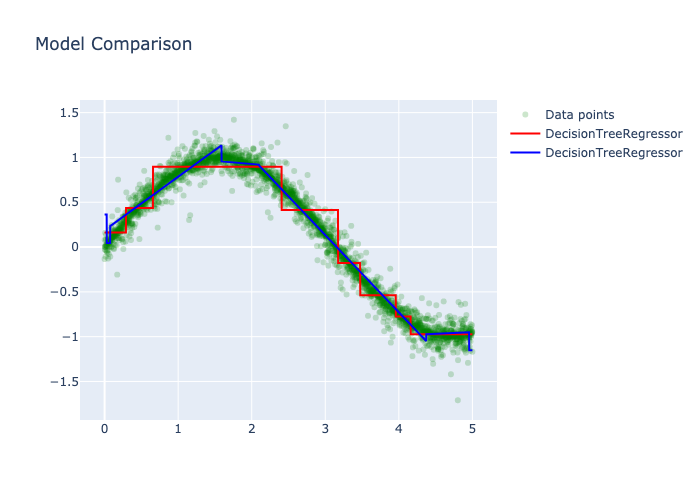

In [38]:
n_samples = 3_000
x = np.linspace(0, 5, n_samples).reshape(-1, 1)
y = np.sin(x.flatten()) + np.random.normal(0, 0.1, n_samples) * np.random.normal(0, 1, n_samples)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.95, random_state=0x4b524f4c2d562d53544f594c4f % (2 ** 32 - 1))

fig = go.Figure(go.Scatter(
    x=X_test.flatten(),
    y=y_test,
    mode='markers',
    name='Data points',
    marker=dict(color='green', opacity=0.2)
))



tree_regressor = DecisionTreeRegressor(max_depth=3)
tree_regressor.fit(X_train, y_train)
y_pred = tree_regressor.predict(X_test)

sorted_indices = np.argsort(X_test.ravel())
X_sorted = X_test[sorted_indices]
y_sorted = y_pred[sorted_indices]

fig.add_trace(go.Scatter(
    x=X_sorted.flatten(),
    y=y_sorted,
    mode='lines',
    name='DecisionTreeRegressor',
    line=dict(color='red')
))




tree_regressor = LinearRegressionTree(
    feature_types=['real'] * 8,
    max_depth=3,
    min_samples_split=10,
    min_samples_leaf=1,
    n_q=500,
)

tree_regressor.fit(X_train, y_train)
y_pred = tree_regressor.predict(X_test)

sorted_indices = np.argsort(X_test.ravel())
X_sorted = X_test[sorted_indices]
y_sorted = y_pred[sorted_indices]

fig.add_trace(go.Scatter(
    x=X_sorted.flatten(),
    y=y_sorted.ravel(),
    mode='lines',
    name='DecisionTreeRegressor',
    line=dict(color='blue')
))

fig.update_layout(
    title="Model Comparison",
    showlegend=True
).show(renderer='png')

**Ответ:**

Ну достоинтства понятны - лучшая точность и способность к экстраполяции. Из недостатков оно требует больше данных и дольше строится

Вставьте что угодно, описывающее ваши впечатления от этого задания:

AAAAAA